# Trabalho em grupo

Instruções importantes:

* Façam uma cópia deste notebook e **enviem o link** dele respondido no sistema.
* Incluam no notebook o nome de todos os integrantes do grupo, assim como está no sistema da impacta
* O trabalho é para ser feito em grupo de 3 a 5 pessoas
* Todas as respostas devem apresentar o código que foi utilizado.
* A resposta deve ser contida no espaço abaixo da pergunta a que se refere e a cima das perguntas seguintes. **Organização importa**
* Só uma pessoa do grupo deve enviar o trabalho.
* Prazo para o trabalho está no sistema
* Qualquer dúvida estou a disposição :D

## Primeiro passo

Baixe o dataset com o comando a baixo

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2025-03-31 23:54:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2025-03-31 23:54:44 (7.23 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



## Questão 1

Qual a mediana da coluna "ram"?

In [30]:
import pandas as pd

df = pd.read_csv("/content/laptops.csv")
#df
mediana = df["RAM"].median()

print(f"A mediana é: {mediana}")

A mediana é: 16.0


## Questão 2

Separe o dataset em treino, validação e teste, utilizando a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Sendo 60% do dataset para treino, 20% para validação e 20% para teste

Obs: O conjunto de validação pode vir do de treino, se não tiver sido especificado

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_diabetes, make_blobs, make_moons, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, silhouette_score, calinski_harabasz_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeRegressor, plot_tree



In [32]:
treino, temporario = train_test_split(df, test_size=0.4)
validacao, teste = train_test_split(temporario, test_size=0.5)


print(f"Tamanho do treino: {len(treino)}")
print(f"Tamanho da validação: {len(validacao)}")
print(f"Tamanho do teste: {len(teste)}")


Tamanho do treino: 1296
Tamanho da validação: 432
Tamanho do teste: 432


## Pergunta 3

Treine um modelo de regressão linear para predizer o preço de um laptop. Qual o RMSE no conjunto de treino, validação e teste? Quais são os coeficientes que foram aprendidos pelo modelo?

In [41]:
X_treino = treino[['RAM']]
y_treino = treino['Final Price']
X_validacao = validacao[['RAM']]
y_validacao = validacao['Final Price']
X_teste = teste[['RAM']]
y_teste = teste['Final Price']

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Previsões
y_treino_pred = modelo.predict(X_treino)
y_validacao_pred = modelo.predict(X_validacao)
y_teste_pred = modelo.predict(X_teste)

# RMSE
rmse_treino = np.sqrt(mean_squared_error(y_treino, y_treino_pred))
rmse_validacao = np.sqrt(mean_squared_error(y_validacao, y_validacao_pred))
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_teste_pred))

print(f"RMSE no conjunto de treino: {rmse_treino}")
print(f"RMSE no conjunto de validação: {rmse_validacao}")
print(f"RMSE no conjunto de teste: {rmse_teste}")
print("Coeficientes:", model.coef_)


RMSE no conjunto de treino: 626.3799550101072
RMSE no conjunto de validação: 597.9636496443457
RMSE no conjunto de teste: 660.2949914036793
Coeficientes: [68.07245074]


## Pergunta 4

Treine um modelo de árvore de decisão para regressão para predizer o preço de um laptop. Qual o RMSE no conjunto de treino, validação e teste?

Plote a árvore utilizando a função [plot_tree](https://scikit-learn.org/1.6/modules/generated/sklearn.tree.plot_tree.html)

RMSE no conjunto de treino: 609.7201895112512
RMSE no conjunto de validação: 594.7716826625423
RMSE no conjunto de teste: 636.9903416721963


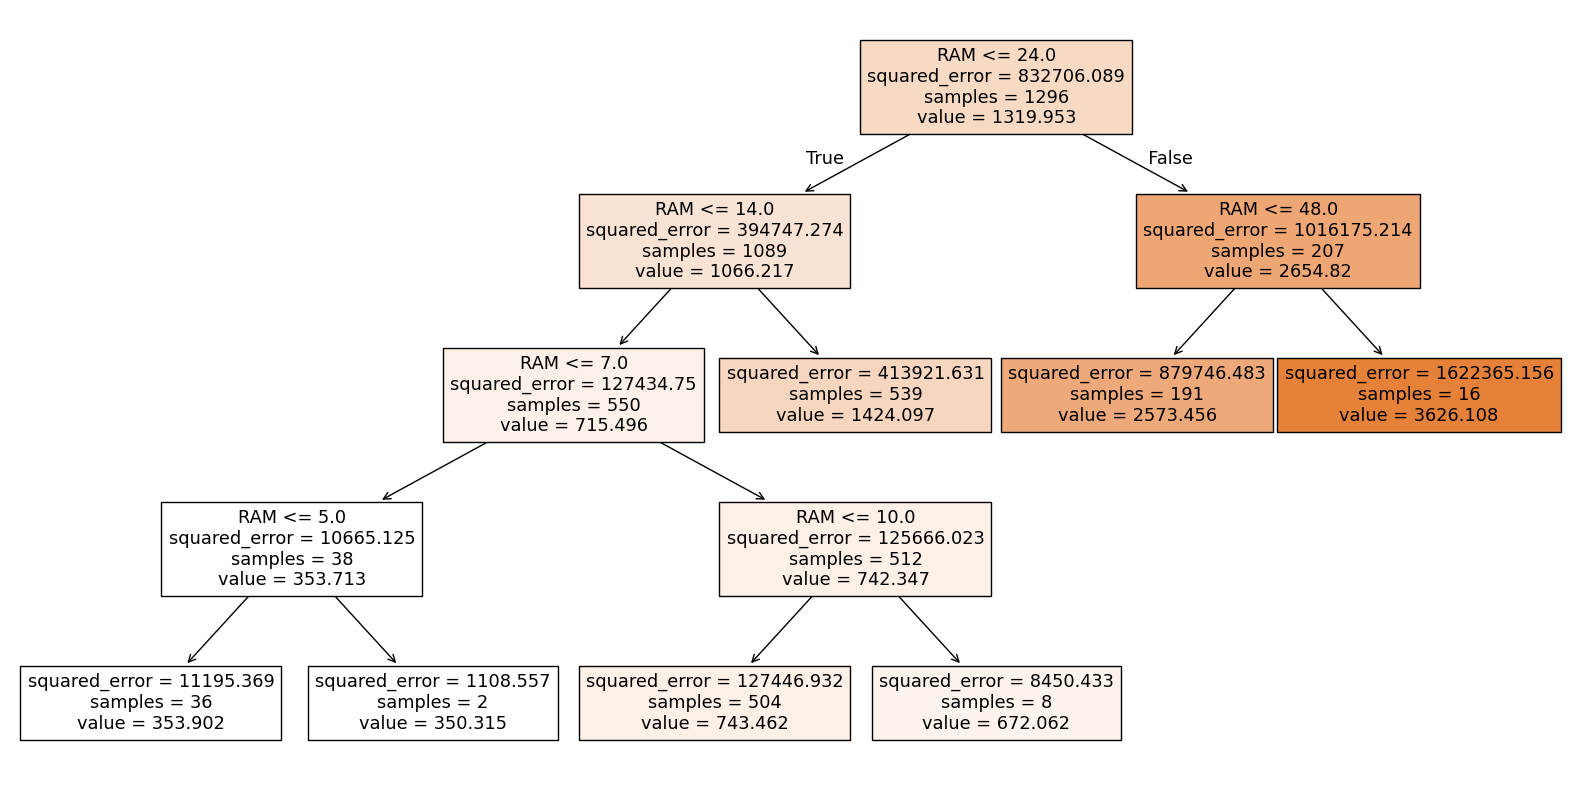

In [42]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_treino, y_treino)

y_treino_tree_pred = tree_model.predict(X_treino)
y_valid_tree_pred = tree_model.predict(X_validacao)
y_test_tree_pred = tree_model.predict(X_teste)

rmse_tree_treino = np.sqrt(mean_squared_error(y_treino, y_treino_tree_pred))
rmse_tree_validacao = np.sqrt(mean_squared_error(y_validacao, y_valid_tree_pred))
rmse_tree_teste = np.sqrt(mean_squared_error(y_teste, y_test_tree_pred))

print(f"RMSE no conjunto de treino: {rmse_tree_treino}")
print(f"RMSE no conjunto de validação: {rmse_tree_validacao}")
print(f"RMSE no conjunto de teste: {rmse_tree_teste}")

# Plotando a árvore
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['RAM'])
plt.show()


## Pergunta 5

Qual dos modelos que você escolheria se fosse usar em um produto ou serviço que estivesse desenvolvendo?

Escolhemos o modelo da árvore de decisão pois apresenta uma complexidade e flexibilidade maior.
Dado que a árvore de decisão parece capturar bem as variações nos dados e permite entender melhor
como diferentes valores de RAM influenciam o preço.

## Pergunta 6

Treine o modelo de árvore de decisão mais uma vez só que agora configure o parâmetro [*max_depth*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) com sendo igual a 3. O que mudou nos erros de treino, teste e validação? Plote a árvore utilizando a função [plot_tree](https://scikit-learn.org/1.6/modules/generated/sklearn.tree.plot_tree.html) O que mudou na estrutura da árvore?

RMSE no conjunto de treino : 609.7456071540635
RMSE no conjunto de validação : 594.8372131020151
RMSE no conjunto de teste: 637.0503222010606


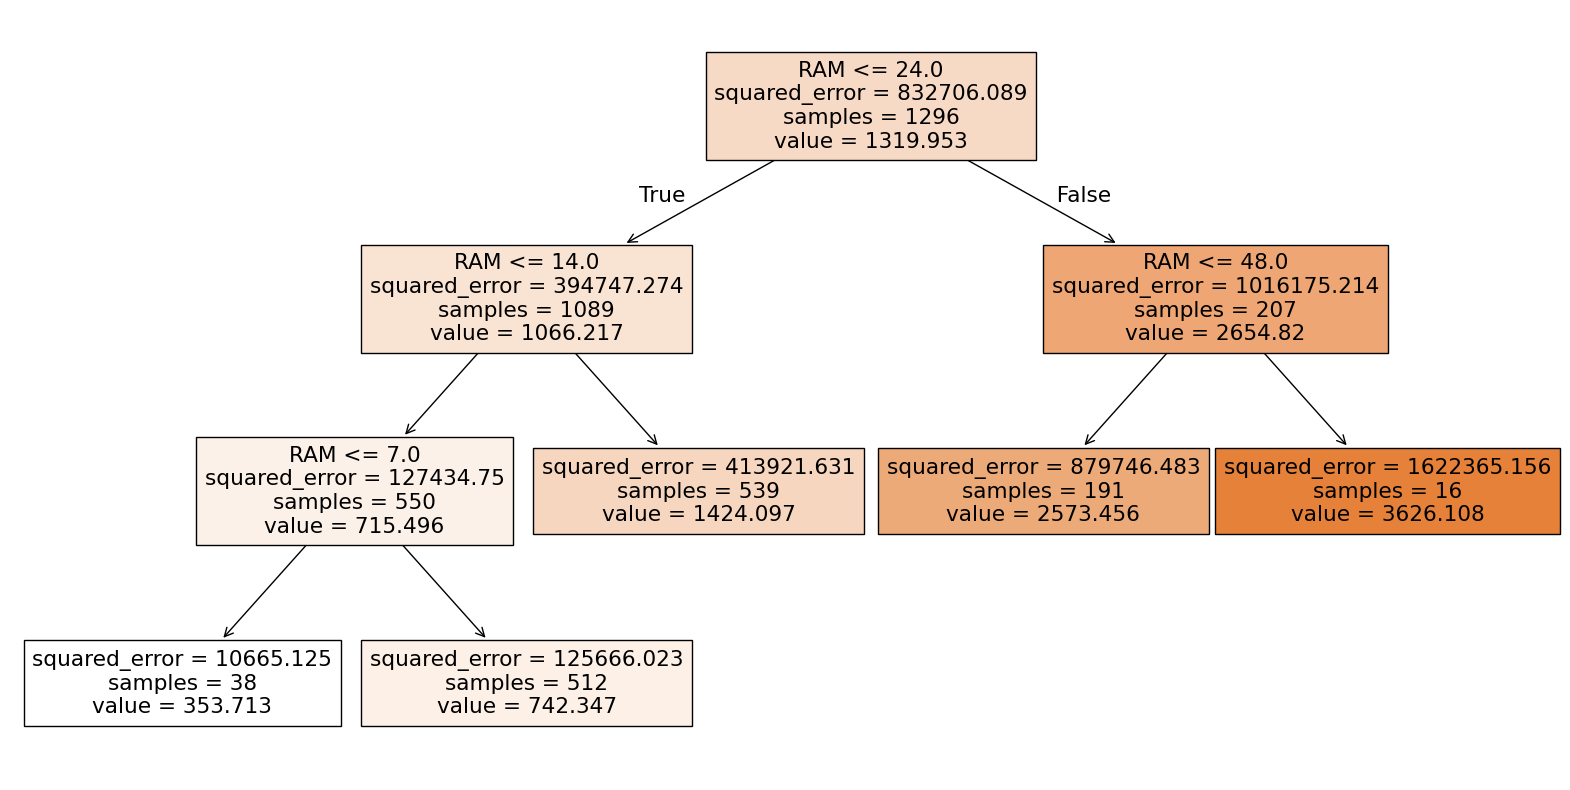

In [45]:
tree_model_depth = DecisionTreeRegressor(max_depth=3)
tree_model_depth.fit(X_treino, y_treino)

y_treino_depth_pred = tree_model_depth.predict(X_treino)
y_validacao_depth_pred = tree_model_depth.predict(X_validacao)
y_teste_depth_pred = tree_model_depth.predict(X_teste)

rmse_tree_depth_train = np.sqrt(mean_squared_error(y_treino, y_treino_depth_pred))
rmse_tree_depth_valid = np.sqrt(mean_squared_error(y_validacao, y_validacao_depth_pred))
rmse_tree_depth_test = np.sqrt(mean_squared_error(y_teste, y_teste_depth_pred))

print(f"RMSE no conjunto de treino : {rmse_tree_depth_train}")
print(f"RMSE no conjunto de validação : {rmse_tree_depth_valid}")
print(f"RMSE no conjunto de teste: {rmse_tree_depth_test}")

# Plotando a árvore
plt.figure(figsize=(20,10))
plot_tree(tree_model_depth, filled=True, feature_names=['RAM'])
plt.show()


## Pergunta 7

Treine o modelo de regressão linear mais uma vez, mas desta vez use a cross validação com [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), erro sendo RMSE e cv=5. Qual o RMSE médio? Quais são os coeficientes aprendidos pelo melhor modelo de regressão linear?

In [ ]:
cv_results = cross_validate(modelo, X_treino, y_treino, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-cv_results['test_score'].mean())

print("RMSE médio:", rmse_cv)
print("Coeficientes:", modelo.coef_)


RMSE médio: 629.260349371846
Coeficientes: [68.07245074]


## Pergunta 8

Plote o resultado da função [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) com os seguintes parâmetros

make_blobs(n_samples=300, centers=4, cluster_std=0.3, random_state=0)

<ipython-input-29-3b249c897ac8>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


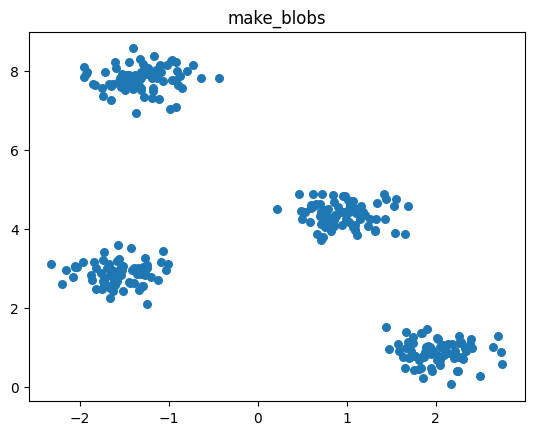

In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.3, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("make_blobs")
plt.show()


## Pergunta 9

Com os pontos gerados na questão 8 responda:



*   Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque


*   Separe os dados entre treino e teste e retreine o K-means, com 80% dos dados para treino e 20% para teste. Ele consegue clusterizar de maneira satisfatória os dados de teste? Por que? Plote os resultados



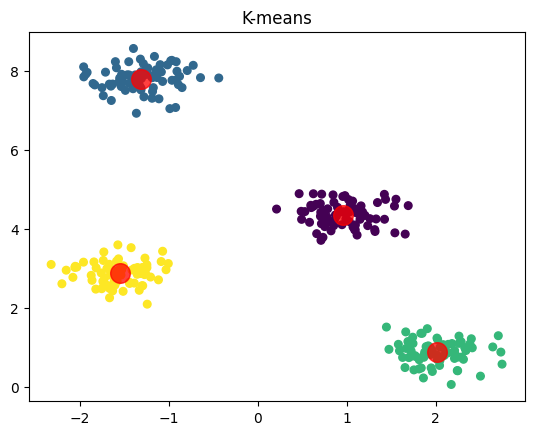

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-means")
plt.show()


Após analisar a visualização do K-means, chegamos a conclusão que parece ser uma alternativa válida e eficaz
para este conjunto de dados. Os clusters estão bem separados, indicando que o método conseguiu identificar e realizar
a clusterização  dos dados. Os centroides estão bem localizados próximos ao centro de cada cluster,
indicando que o K-means encontrou boas posições para os centros dos grupos.

## Pergunta 10

Utilize os dados da questão 8, dessa vez separando entre 80% para treino e 20% para teste, use score de silhueta através da função [silhouette_score](https://scikit-learn.org/1.6/modules/generated/sklearn.metrics.silhouette_score.html) para demonstrar como escolher a quantidade ideal de clusters



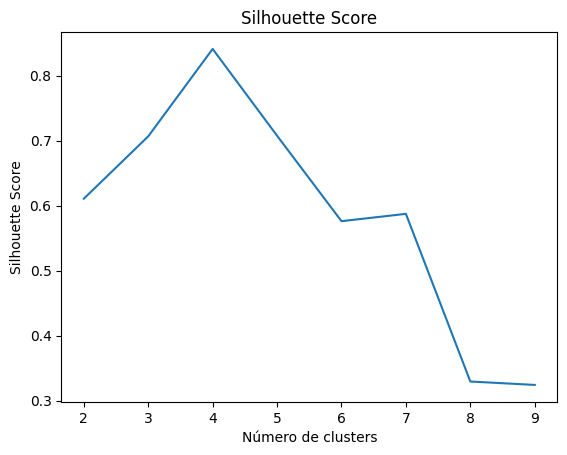

In [49]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))

plt.plot(k_range, silhouette_scores)
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

